# Hand Gesture Classification Neural Network

**Importing Necessary Libraries**

In [190]:
import numpy as np
import pandas as pd
import cv2 
import os
import matplotlib.pyplot as plt
import random

**Reading all images and identifying their types**

In [191]:
images=[]
category=[]

main='/kaggle/input/hand-gestures-nn-ds-1/Masked Gesture Dataset'

for type_img in os.listdir(main):
    sub=os.path.join(main, type_img)
    for name in os.listdir(sub):
        img_path=os.path.join(sub, name)
        images.append([type_img, img_path])
    category.append(type_img)

In [192]:
category

['1finger',
 'thumbsdown',
 '2finger',
 '3finger',
 'yoyo',
 'spreadoutpalm',
 'pinky',
 'thumbsup',
 'fingersclosein',
 'kitli',
 'italydown']

In [193]:
df=pd.DataFrame(images, columns=['Type', 'Image_Path'])
df

,Type,Image_Path
0,1finger,/kaggle/input/hand-gestures-nn-ds-1/Masked Ges...
1,1finger,/kaggle/input/hand-gestures-nn-ds-1/Masked Ges...
2,1finger,/kaggle/input/hand-gestures-nn-ds-1/Masked Ges...
3,1finger,/kaggle/input/hand-gestures-nn-ds-1/Masked Ges...
4,1finger,/kaggle/input/hand-gestures-nn-ds-1/Masked Ges...
...,...,...
13457,italydown,/kaggle/input/hand-gestures-nn-ds-1/Masked Ges...
13458,italydown,/kaggle/input/hand-gestures-nn-ds-1/Masked Ges...
13459,italydown,/kaggle/input/hand-gestures-nn-ds-1/Masked Ges...
13460,italydown,/kaggle/input/hand-gestures-nn-ds-1/Masked Ges...


**Converting Images to NumPy Arrays**

In [194]:
def img_to_arr(img_path):
    img=cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) ##point grey addn possible
    img1=cv2.resize(img, (128, 128))
    return img1.reshape(-1)/255.0

In [195]:
df['Image']=df['Image_Path'].apply(lambda x:img_to_arr(x))

**Randomizing the dataset**

In [196]:
data=df.sample(frac=1.0, random_state=87)
data.reset_index(drop=True,inplace=True)
data.drop(columns=['Image_Path'], inplace=True)


**Creating Train and Test Datasets**

In [197]:
m=data.shape[0]
train_size=int(0.8*m)
test_size=int(0.2*m)
train=data[0:train_size]
test=data[0:test_size]

def input_arr(df):
    a = np.stack(df['Image'])
    return a

def output_arr(df):
    Y=(df['Type']).values
    Y=np.reshape(Y, (len(Y), 1))
    return Y

def train_sets(data_train):
    X_train=input_arr(data_train)
    Y_train=output_arr(data_train)
    return X_train, Y_train

def test_sets(data_test):
    X_test=input_arr(data_test)
    Y_test=output_arr(data_test)
    return X_test, Y_test

In [198]:
X_train, Y_train=train_sets(train) 
X_test, Y_test=train_sets(test) 

print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (10769, 16384)
Shape of Y_train :  (10769, 1)
Shape of X_test :  (2692, 16384)
Shape of Y_test :  (2692, 1)


**Verifying dataset by loading any random image**

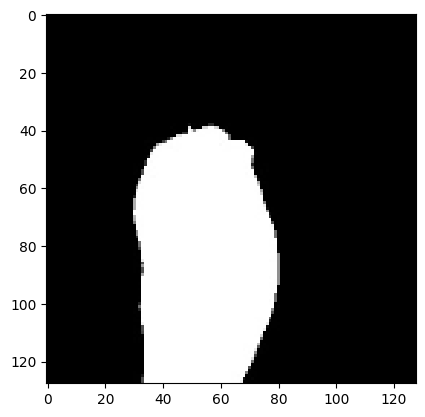

In [199]:
#For train dataset

img_train=random.randint(0, X_train.shape[0]-1)
current_image = X_train[img_train, :].reshape((128, 128))*255.0
plt.imshow(current_image, interpolation='nearest', cmap='gray')
plt.show()

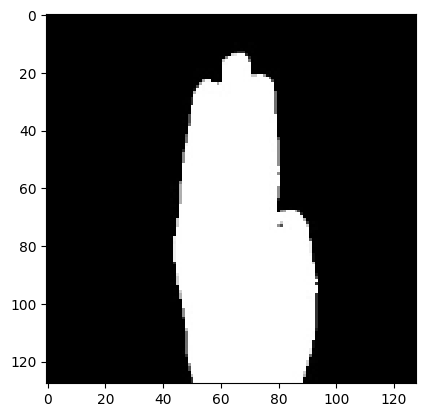

In [200]:
#For test dataset

img_test=random.randint(0, X_test.shape[0]-1)
current_image = X_test[img_test, :].reshape((128, 128))*255.0
plt.imshow(current_image, interpolation='nearest', cmap='gray')
plt.show()

**Creating Dictionaries for assigning unique values to each of the image categories**

In [201]:
ind_lbl={}
inv={}
for i in range(len(category)):
    label = category[i]
    ind_lbl[label] = i
print(ind_lbl)

for j in range(len(category)):
    inv[j]=category[j]
print(inv)

{'1finger': 0, 'thumbsdown': 1, '2finger': 2, '3finger': 3, 'yoyo': 4, 'spreadoutpalm': 5, 'pinky': 6, 'thumbsup': 7, 'fingersclosein': 8, 'kitli': 9, 'italydown': 10}
{0: '1finger', 1: 'thumbsdown', 2: '2finger', 3: '3finger', 4: 'yoyo', 5: 'spreadoutpalm', 6: 'pinky', 7: 'thumbsup', 8: 'fingersclosein', 9: 'kitli', 10: 'italydown'}


**Converting names of categories in output train dataset to respective values in accordance with above dictionaries**


In [202]:
Y_train_val=np.array([ind_lbl[label] for label in Y_train.T[0]])
Y_train_val=np.reshape(Y_train_val, (1, 10769))
print(Y_train_val.shape)

(1, 10769)


**Code of Neural Network with all required functions**

In [210]:
def init(X, Y):
    nx=X.shape[0]
    ny=len(category)
    nh1=250
    m=Y.shape[0]
    W1=np.random.randn(nh1, nx)*0.01
    b1=np.zeros((nh1, 1))
    W2=np.random.randn(ny, nh1)*0.01
    b2=np.zeros((ny, 1))
    return W1, b1, W2, b2 
    
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(Z, 0)

def relu_deriv(Z):
    return Z>0

def sigm_deriv(Z):
    return Z*(1-Z)

def one_hot(Y):
    num_classes=len(category)
    one_hot_Y=np.zeros((num_classes, len(Y)), dtype=float)
    for i, label in enumerate(Y):
        one_hot_Y[label, i]=1.0
    return one_hot_Y

def fwdprop(W1, b1, W2, b2, X):
    Z1=W1.dot(X)+b1 #nh1*m
    A1=relu(Z1)
    Z2=W2.dot(A1)+b2 #nh2*m
    A2=sigmoid(Z2)
    return Z1, A1, Z2, A2

def backprop(Z1, A1, Z2, A2, W1, W2, X, Y):
    dZ2=A2-Y 
    dW2=dZ2.dot(A1.T)/m 
    db2=np.sum(dZ2, axis=1, keepdims=True)/m 
    dZ1=(W2.T.dot(dZ2))*relu_deriv(A1) 
    dW1=dZ1.dot(X.T)/m #nh1*nx
    db1=np.sum(dZ1, axis=1, keepdims=True)/m
    
    return dW1, db1, dW2, db2
    
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, X, Y, alpha):
    W1-=alpha*dW1
    b1-=alpha*db1
    W2-=alpha*dW2
    b2-=alpha*db2
    return W1, b1, W2, b2

def get_predictions(A3):
    return np.argmax(A3, axis=0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y)/Y.size
    
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2=init(X, Y)
    oh_Y=one_hot(Y)
    for i in range(iterations):
        Z1, A1, Z2, A2=fwdprop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2=backprop(Z1, A1, Z2, A2, W1, W2, X, oh_Y)
        W1, b1, W2, b2=update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, X, Y, alpha)
        if i%50==0:
            print("Iteration : ", i)
            print("Accuracy : ",get_accuracy(get_predictions(A2), Y.T)*100, " %")
    print("Final Accuracy : ", get_accuracy(get_predictions(A2), Y.T)*100, " %")
    return W1, b1, W2, b2

**Training the Neural Network**

In [211]:
W1, b1, W2, b2=gradient_descent(X_train.T, Y_train_val.T, 250, 0.1)

Iteration :  0
[3 3 3 ... 0 3 4] [[7 6 0 ... 3 2 2]]
Accuracy :  9.926641285170398  %
Iteration :  50
[7 6 0 ... 4 2 0] [[7 6 0 ... 3 2 2]]
Accuracy :  69.4493453431145  %
Iteration :  100
[7 6 0 ... 4 2 2] [[7 6 0 ... 3 2 2]]
Accuracy :  81.32602841489461  %
Iteration :  150
[7 6 0 ... 8 2 2] [[7 6 0 ... 3 2 2]]
Accuracy :  95.1898969263627  %
Iteration :  200
[7 6 0 ... 4 2 2] [[7 6 0 ... 3 2 2]]
Accuracy :  97.22351193239855  %
[7 6 0 ... 8 2 2] [[7 6 0 ... 3 2 2]]
Final Accuracy :  98.36567926455567  %


**Applying Neural Network on Test Dataset**

In [107]:
Y_test_val=np.array([ind_lbl[label] for label in Y_test.T[0]])
Y_test_val=np.reshape(Y_test_val, (1, test_size))
print(Y_test_val.shape)

(1, 2692)


In [108]:
X_test=X_test.T
_, _, _, A2=fwdprop(W1, b1, W2, b2, X_test)
accuracy=get_accuracy(get_predictions(A2), Y_test_val)
print("Accuracy on Test Dataset : ", accuracy*100, " %")

[7 6 0 ... 2 5 4] [[7 6 0 ... 2 5 4]]
Accuracy on Test Dataset :  98.32838038632985  %


**Applying Neural Network on any random image from test dataset**

In [167]:
def final_Y2(val):
    for a, c in inv.items():
        if (val==lbl):
            return key
        return "invalid type"
        

6
Image No. -  1546
Correct Label -  pinky
Predicted Label -  pinky


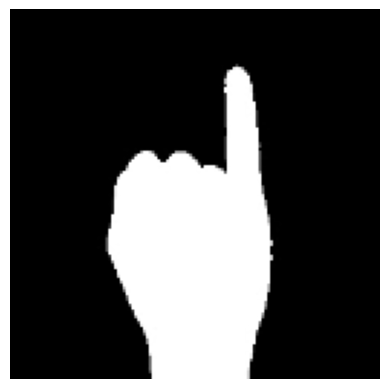

In [179]:
ind=random.randint(0, (X_test.shape[1]-1))
random_img=X_test[:, ind].reshape(-1, 1)
rt_val=Y_test_val[0, ind]
name=Y_test[ind, 0]
_, _, _, A2=fwdprop(W1, b1, W2, b2, random_img)
num=get_predictions(A2)[0]
print(num)
pred=inv[num]
print("Image No. - ", ind)
print("Correct Label - ", name)
print("Predicted Label - ", pred)
img=random_img.reshape(128, 128)
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()